# Question 1

In [1]:
datContent = [i.strip().split("::") for i in open(r"./movies.dat").readlines()]
datContent1 = [i.strip().split("::") for i in open(r"./ratings.dat").readlines()]
datContent2 = [i.strip().split("::") for i in open(r"./users.dat").readlines()]
%matplotlib inline
#making a list of each line in the .dat file with "::" as the delimitter

# Question 2

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Iterable
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
#importing libraries

In [3]:
movie_df=pd.DataFrame(datContent,columns=['MovieID',"Title","Genere"])#creating df

In [4]:
rating_df=pd.DataFrame(datContent1,columns=['UserID','MovieID',"Rating","Timestamp"])#creating df

In [5]:
user_df=pd.DataFrame(datContent2,columns=['UserID','Gender',"Age","Occupation","Zipcode"])#creating df

In [6]:
temp=pd.merge(rating_df,movie_df,on='MovieID')#merging ratingdf and moviedf on the key MovieID 

In [7]:
Master_Data=pd.merge(temp,user_df,on="UserID")#merging temp and userdf on the key userID

In [8]:
Master_Data.drop(['Genere',"Timestamp","Zipcode"],axis=1,inplace=True)#dropping the unrequired columns

# Question 3

Q3.1

In [9]:
# method to change the column age 
def amending_age_column(x):
    str(x)
    if x=='1':
        return("Under 18")
    elif(x=='18'):
        return("18-24")
    elif(x=='25'):
        return('25-34')
    elif(x=='35'):
        return ("35-44")
    elif(x=='45'):
        return ("45-49")
    elif(x=='50'):
        return ("50-55")
    elif(x=='56'):
        return ("56+")
   
        

In [10]:
man=user_df.copy()
man.Age=man.Age.apply(amending_age_column)
man

,UserID,Gender,Age,Occupation,Zipcode
0,1,F,Under 18,10,48067
1,2,M,56+,16,70072
2,3,M,25-34,15,55117
3,4,M,45-49,7,02460
4,5,M,25-34,20,55455
5,6,F,50-55,9,55117
6,7,M,35-44,1,06810
7,8,M,25-34,12,11413
8,9,M,25-34,17,61614
9,10,F,35-44,1,95370


In [11]:
df=man.groupby('Age')#grouping on column Age
man_grouped=df.count()#
array_x=man_grouped.index.array
array_y=man_grouped['UserID'].array

Text(0.5, 1.0, 'User Age Distribution')

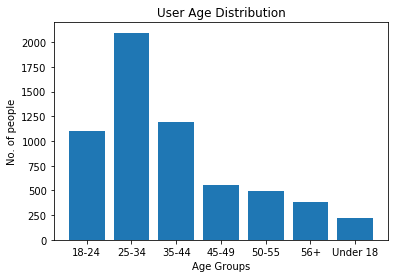

In [12]:
plt.bar(array_x,array_y)
plt.xlabel("Age Groups")
plt.ylabel("No. of people")
plt.title("User Age Distribution")


Q3.2

In [13]:
ToyStory=rating_df[rating_df.MovieID=='1']

In [14]:
ToyStory_df=ToyStory.groupby("Rating")

In [15]:
ts=ToyStory_df.count()

In [16]:
ts_yaxis=ts.UserID.array

In [17]:
ts_xaxis=ts.index.array

Text(0.5, 1.0, 'Toy Story Ratings')

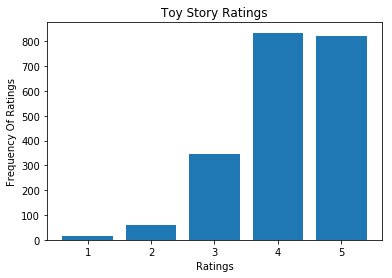

In [18]:
plt.bar(ts_xaxis,ts_yaxis)
plt.xlabel("Ratings")
plt.ylabel("Frequency Of Ratings")
plt.title("Toy Story Ratings")

Q3.3

In [19]:
Master_Data.Rating.replace({"1":1,"2":2,"3":3,"4":4,"5":5},inplace=True)#casting did not work so replaced string with integer

In [20]:
a2=Master_Data.groupby("Title").Rating.mean()#avg rating of each movie

In [21]:
a1=Master_Data.groupby("Title").count().UserID#Total no of people rating a particular movie


In [22]:
total=a1*a2#multiplying both the series to get the total rating recieved by a particular movie

In [23]:
total_series=total.sort_values(ascending=False).head(25)#Choosing top 25 amongst these 

In [24]:
top_x=total_series.index.array

In [25]:
top_y=total_series.values

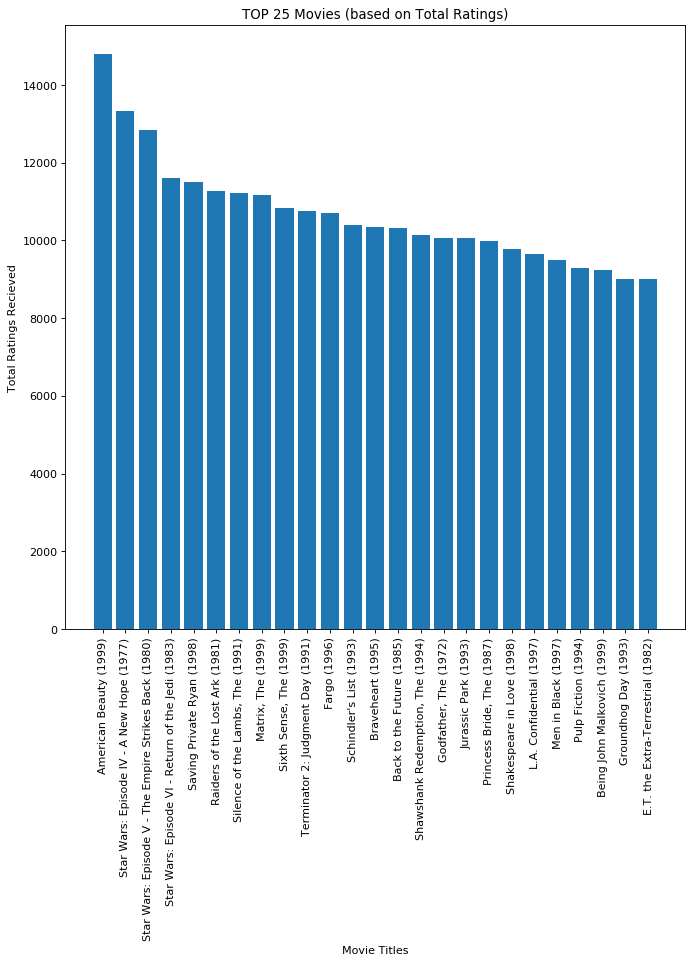

In [26]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(top_x,top_y)
plt.xlabel("Movie Titles")
plt.ylabel("Total Ratings Recieved")
plt.title("TOP 25 Movies (based on Total Ratings)")
m=plt.xticks(top_x,rotation="vertical")

Q3.4

In [27]:
user_df=Master_Data[Master_Data.UserID=='2696']

In [28]:
user_y=user_df.Rating.values
user_x=user_df.Title.values

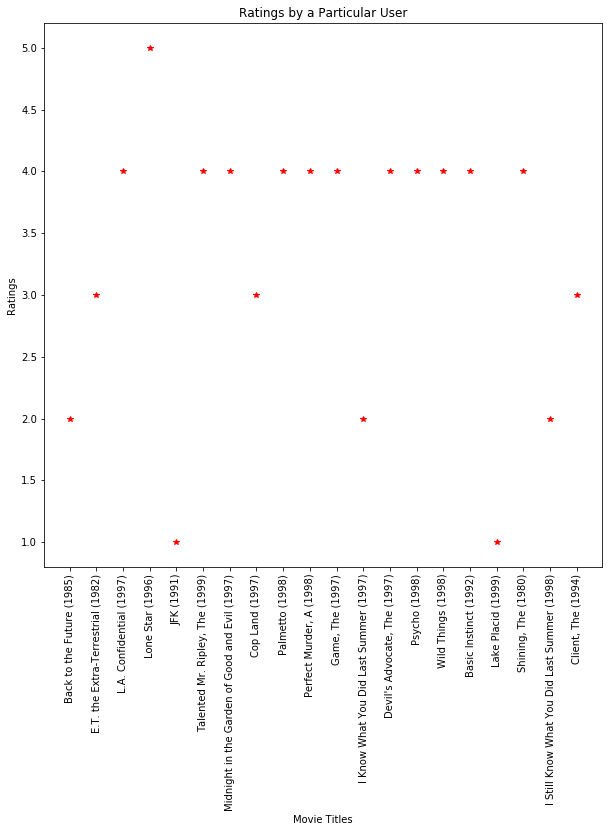

In [29]:
figure(num=None, figsize=(10, 10))

plt.plot(user_x,user_y,'r*')
plt.xlabel("Movie Titles")
plt.ylabel("Ratings")
plt.title("Ratings by a Particular User")
n=plt.xticks(user_x,rotation="vertical")

# Feature Engineering Q4

Q4.1 Find out all the unique genres

In [30]:
genre_array=movie_df.Genere.array
genre_list=list(genre_array)
list_of_lists=[]
for i in genre_list:
    i=i.split("|")
    list_of_lists.append(i)

In [31]:

def backto1D(lis):#function to convert 2d list to 1d list using a generetor
     for item in lis:
            if isinstance(item, Iterable) and not isinstance(item, str):
                for x in backto1D(item):
                    yield x
            else:        
                    yield item
all_genres=list(backto1D(list_of_lists)) 
unique_genres=list(set(all_genres))

In [32]:
unique_genres

['Romance',
 'Sci-Fi',
 'War',
 'Adventure',
 'Horror',
 'Action',
 'Animation',
 'Crime',
 "Children's",
 'Documentary',
 'Musical',
 'Comedy',
 'Fantasy',
 'Western',
 'Mystery',
 'Film-Noir',
 'Drama',
 'Thriller']

Q4.2 Create a separate column for each genre category with a one-hot encoding

In [33]:
#creating empty list for each genre
list_animation=[]
list_crime=[]
list_children=[]
list_fantasy=[]
list_horror=[]
list_musical=[]
list_comedy=[]
list_sci=[]
list_drama=[]
list_action=[]
list_doc=[]
list_mystery=[]
list_thriller=[]
list_noir=[]
list_western=[]
list_adventure=[]
list_romance=[]
list_war=[]
#appending to right list for a movie 
for i in genre_list:
    if("Animation" in i):
        list_animation.append(1)
    else:
        list_animation.append(0)
    if("Crime" in i):
        list_crime.append(1)
    else:
        list_crime.append(0)   
    if("Children's" in i):
        list_children.append(1)
    else:
        list_children.append(0)
    if("Fantasy" in i):
        list_fantasy.append(1)
    else:
        list_fantasy.append(0) 
    if ("Horror" in i):
        list_horror.append(1)
    else:
        list_horror.append(0)
    if ("Musical" in i):
        list_musical.append(1)
    else:
        list_musical.append(0)
    if ("Comedy" in i):
        list_comedy.append(1)
    else:
        list_comedy.append(0)
    if ("Sci-Fi" in i):
        list_sci.append(1)
    else:
        list_sci.append(0)
    if ("Drama" in i):
        list_drama.append(1)
    else:
        list_drama.append(0)      
    if ("Action" in i):
        list_action.append(1)
    else:
        list_action.append(0)
    if ("Documentary" in i):
        list_doc.append(1)
    else:
        list_doc.append(0)
    if ("Mystery" in i):
        list_mystery.append(1)
    else:
        list_mystery.append(0) 
    if ("Thriller" in i):
        list_thriller.append(1)
    else:
        list_thriller.append(0)
    if ("War" in i):
        list_war.append(1)
    else:
        list_war.append(0)
    if ("Film-Noir" in i):
        list_noir.append(1)
    else:
        list_noir.append(0)
    if ("Western" in i):
        list_western.append(1)
    else:
        list_western.append(0)
    if ("Adventure" in i):
        list_adventure.append(1)
    else:
        list_adventure.append(0)
    if ("Romance" in i):
        list_romance.append(1)
    else:
        list_romance.append(0)
        



In [34]:
genre_df=movie_df.copy()#making A copy

In [35]:
#creating column by using .assign method and passing th erespective genre's list
genre_df=genre_df.assign(Animation=list_animation,Crime=list_crime,
                         Children=list_children,Fantasy=list_fantasy,
                         Horror=list_horror,Musical=list_musical,
                         Comedy=list_comedy,Sci_Fi=list_sci,
                         Drama=list_drama,Action=list_action,
                         Documentary=list_doc,Mystery=list_mystery,
                         Thriller=list_thriller,War=list_war,
                         Film_Noir=list_noir,Western=list_western
                         ,Adventure=list_adventure,Romance=list_romance)
genre_df

,MovieID,Title,Genere,Animation,Crime,Children,Fantasy,Horror,Musical,Comedy,...,Drama,Action,Documentary,Mystery,Thriller,War,Film_Noir,Western,Adventure,Romance
0,1,Toy Story (1995),Animation|Children's|Comedy,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),Action|Crime|Thriller,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,8,Tom and Huck (1995),Adventure|Children's,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,9,Sudden Death (1995),Action,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


Q4.3 Determine the features affecting the ratings of any particular movie (Using Gini Index)

Q4.4 Develop an appropriate model to predict the movie ratings(Using Random Forest)

In [36]:
movie_df=pd.DataFrame(datContent,columns=['MovieID',"Title","Genere"])#creating df
rating_df=pd.DataFrame(datContent1,columns=['UserID','MovieID',"Rating","Timestamp"])#creating df
user_df=pd.DataFrame(datContent2,columns=['UserID','Gender',"Age","Occupation","Zipcode"])#creating df
temp=pd.merge(rating_df,movie_df,on='MovieID')#merging ratingdf and moviedf on the key MovieID 
Master_Data=pd.merge(temp,user_df,on="UserID")
dataset=Master_Data.drop(["Timestamp","Title","UserID","Zipcode"],axis=1,inplace=False)#dropping the unrequired columns

In [37]:
#Method1
import time
Master_Data['Year'] = Master_Data['Timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(int(x))))


Master_Data['Month'] = Master_Data['Timestamp'].apply(lambda x: time.strftime('%m', time.localtime(int(x))))

Master_Data.info()

#Method2
from datetime import datetime
Master_Data['Timestamp2'] = Master_Data['Timestamp'].apply(lambda x: datetime.fromtimestamp(int(x)))

Master_Data['Genere_1'] = Master_Data.Genere.str.split('|')

Master_Data.head()

def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

movie_rating_n=tidy_split(movie_df, 'Genere', sep='|')


movie_rating_n['movie_year'] =movie_rating_n['Title'].str.extract('.*\((.*)\).*',expand = False)

movie_rating_n['Title_N']=movie_rating_n.Title.str[:-7]

movie_year1=movie_rating_n.groupby(['movie_year', 'Genere']).size()
movie_year1.rename(columns={'name_year': 'count'}, inplace=True)
movie_year1=movie_year1.reset_index()


movie_summary=movie_rating_n.groupby(['Title_N','MovieID','movie_year']).size()
movie_summary=movie_summary.rename(columns={'Title_N','MovieID','movie_year'}, inplace=True)

movie_summary=movie_summary.reset_index()

Master_Data_N=pd.merge(Master_Data,movie_summary,left_on='MovieID',right_on='MovieID',how='left')


Master_Data_N.rename(columns={0:'Genere_cnt'}, inplace=True)

movie_year2=movie_rating_n.groupby(['movie_year']).size()

movie_year2.rename(columns={'name_year','cnt'}, inplace=True)

movie_year2=movie_year2.reset_index()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
UserID        1000209 non-null object
MovieID       1000209 non-null object
Rating        1000209 non-null object
Timestamp     1000209 non-null object
Title         1000209 non-null object
Genere        1000209 non-null object
Gender        1000209 non-null object
Age           1000209 non-null object
Occupation    1000209 non-null object
Zipcode       1000209 non-null object
Year          1000209 non-null object
Month         1000209 non-null object
dtypes: object(12)
memory usage: 99.2+ MB


In [38]:
genere_1=movie_rating_n.groupby(['Genere','MovieID']).size()
genere_1.rename(columns={'Genere','cnt'}, inplace=True)
genere_1=genere_1.reset_index()
genere_1.info()
genere_1.sort_values(by=[0], inplace=True,ascending=False)
test=movie_rating_n[['MovieID','Genere']]
test['flag']=1
test.transpose()
res = test.pivot_table(index=['MovieID'], values='flag',columns=['Genere'],fill_value=0)
res=res.reset_index()
Master_Data_N1=pd.merge(Master_Data_N,res,left_on='MovieID',right_on='MovieID',how='left')
Master_Data_N1.info()
data_gini=Master_Data_N.drop(['UserID','MovieID','Timestamp','Title','Zipcode','Month','Timestamp2','Genere_1','Title_N'],axis=1)
d=data_gini.info()
data_gini.describe()
data_gini['movie_year']=pd.to_numeric(data_gini['movie_year']).astype(int)
data_gini['Year']=pd.to_numeric(data_gini['Year']).astype(int)

data_gini['diff_yrs']=data_gini['Year'] - data_gini['movie_year']
data_gini=pd.get_dummies(data_gini, prefix=['Genere','Gender','Occupation'], columns=['Genere','Gender','Occupation'])
features=data_gini


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 3 columns):
Genere     6408 non-null object
MovieID    6408 non-null object
0          6408 non-null int64
dtypes: int64(1), object(2)
memory usage: 150.3+ KB


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 35 columns):
UserID         1000209 non-null object
MovieID        1000209 non-null object
Rating         1000209 non-null object
Timestamp      1000209 non-null object
Title          1000209 non-null object
Genere         1000209 non-null object
Gender         1000209 non-null object
Age            1000209 non-null object
Occupation     1000209 non-null object
Zipcode        1000209 non-null object
Year           1000209 non-null object
Month          1000209 non-null object
Timestamp2     1000209 non-null datetime64[ns]
Genere_1       1000209 non-null object
Title_N        1000209 non-null object
movie_year     1000209 non-null object
Genere_cnt     1000209 non-null int64
Action         1000209 non-null int64
Adventure      1000209 non-null int64
Animation      1000209 non-null int64
Children's     1000209 non-null int64
Comedy         1000209 non-null int64
Crime          1000209 non-

In [39]:
""""Since random forest is incapable of working on a dataset with dimensions (1000209,303) 
hence we will make a random dataframe with random 10000 records """
index_array=np.random.randint(0,1000209,10000)
features.drop(columns=["Year","movie_year"],inplace=True)


In [40]:
features=features.iloc[index_array]

labels=features[['Rating']]

features = features.drop('Rating', axis = 1)


In [41]:
Y=labels.values.ravel()
X=features.values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state=0)
feat_labels =features.columns.ravel()


In [43]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train it
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [44]:
gini_df=pd.DataFrame(data=clf.feature_importances_,index=feat_labels,columns=["Gini Index"])

In [45]:
gini_df=gini_df.sort_values("Gini Index",ascending=False)
gini_df#features on which Ratings depend (in decreasing order) 

,Gini Index
diff_yrs,0.263793
Age,0.125155
Genere_cnt,0.031847
Occupation_0,0.020815
Occupation_7,0.017874
Occupation_1,0.017471
Occupation_4,0.016349
Gender_M,0.016346
Gender_F,0.016322
Occupation_17,0.015415


In [46]:
Y_predicted=clf.predict(X_test)

In [47]:
#accuracy calculation
accuracy_score(y_test,Y_predicted)

0.309